In [81]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from scipy.interpolate import LinearNDInterpolator, RBFInterpolator

PARENT_DIR = r'D:\projects\diverters\src'
CURR_DIR = os.path.join(PARENT_DIR, 'conductivity_effect')
sys.path.append(PARENT_DIR)

In [82]:
def make_grid(_min, _max, _n):
    _lin_vals = np.linspace(_min, _max, _n)
    _xv, _yv = np.array(np.meshgrid(_lin_vals, _lin_vals))
    return pd.DataFrame({'x': _xv.ravel(), 'y': _yv.ravel()})

def plot_df(_df, title=None):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(_df.iloc[:, 0], _df.iloc[:, 1], _df.iloc[:, 2])

    col_names = _df.columns.tolist()
    ax.set_xlabel(col_names[0])
    ax.set_ylabel(col_names[1])
    ax.set_zlabel(col_names[2], labelpad=-2)

    if title:
        ax.set_title(title)

    plt.subplots_adjust(left=0.0, right=1.20, bottom=0.0, top=1.20)

    plt.show()

In [110]:
def func(_x, _y):
    return _x ** 3 + _y ** 3

source_grid = make_grid(0, 10, 5)
source_grid['z'] = func(source_grid['x'], source_grid['y'])

gpr_grid = make_grid(0, 10, 100)
lin_grid = make_grid(0, 10, 100)
rbf_grid = make_grid(0, 10, 100)

valid_grid = make_grid(0, 200, 200)
valid_grid['z'] = func(valid_grid['x'], valid_grid['y'])

In [111]:
x, y = source_grid.iloc[:, :2], source_grid.iloc[:, 2]

gpr = GaussianProcessRegressor()
gpr.fit(x, y)
gpr_grid['z'] = gpr.predict(gpr_grid.iloc[:, :2])

lin_interp = LinearNDInterpolator(x, y)
lin_grid['z'] = gpr.predict(lin_grid.iloc[:, :2])

rbf_interp = RBFInterpolator(x, y)
rbf_grid['z'] = gpr.predict(rbf_grid.iloc[:, :2])

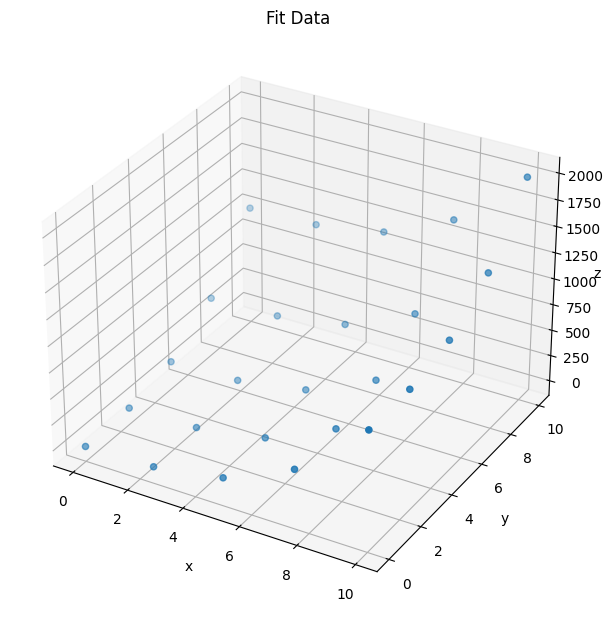

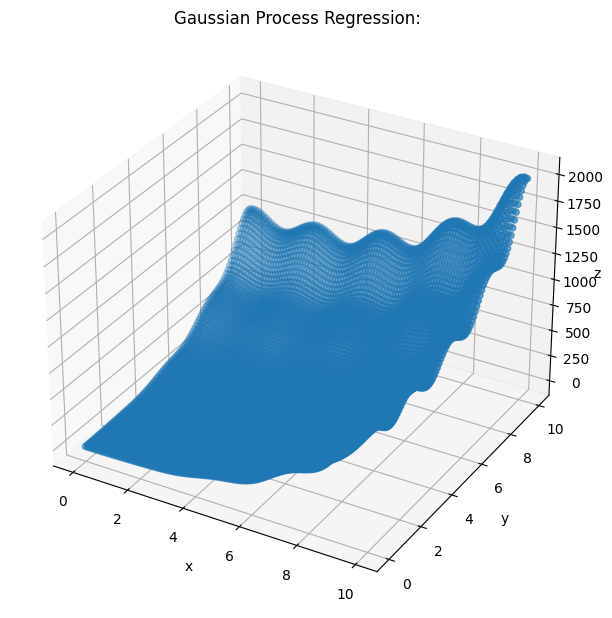

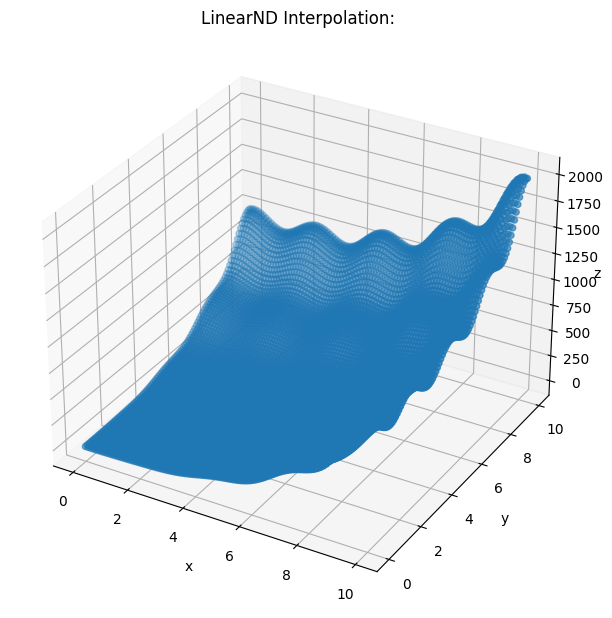

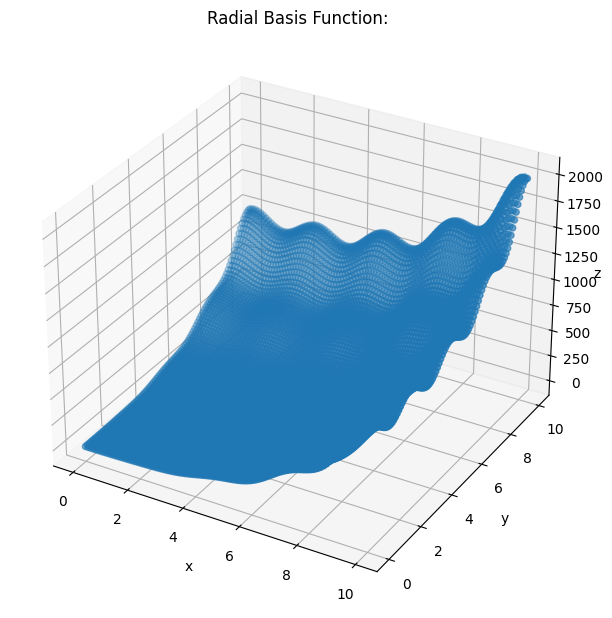

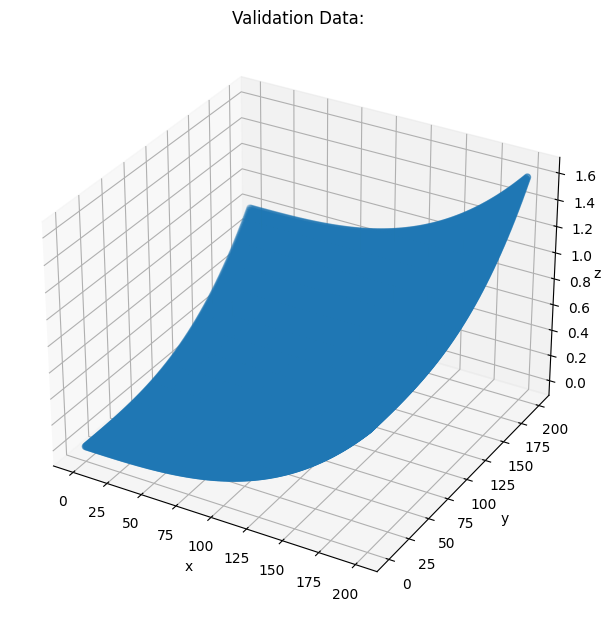

In [112]:
plot_df(source_grid, title="Fit Data")
plot_df(gpr_grid, title="Gaussian Process Regression:")
plot_df(lin_grid, title="LinearND Interpolation:")
plot_df(rbf_grid, title="Radial Basis Function:")
plot_df(valid_grid, title="Validation Data:")